In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
df= pd.read_csv("Google_train_data.csv")

In [3]:
df.head()

,Date,Open,High,Low,Close,Volume
0,1/3/2012,325.25,332.83,324.97,663.59,"7,380,500"
1,1/4/2012,331.27,333.87,329.08,666.45,"5,749,400"
2,1/5/2012,329.83,330.75,326.89,657.21,"6,590,300"
3,1/6/2012,328.34,328.77,323.68,648.24,"5,405,900"
4,1/9/2012,322.04,322.29,309.46,620.76,"11,688,800"


In [4]:
df.sample(5)

,Date,Open,High,Low,Close,Volume
462,11/4/2013,513.82,514.26,509.11,"1,023.30","2,286,000"
116,6/19/2012,285.72,291.05,285.49,579.94,"4,167,900"
1231,11/22/2016,772.63,776.96,767.00,768.27,"1,593,100"
834,4/29/2015,550.47,553.68,546.91,549.08,"1,698,800"
325,4/22/2013,398.81,400.48,386.05,797.92,"5,788,300"


In [5]:
df["Close"] = [float(str(i).replace(",", "")) for i in df["Close"]]


In [6]:
df.describe()

,Open,High,Low,Close
count,1258.000000,1258.000000,1258.000000,1258.000000
mean,533.709833,537.880223,529.007409,712.669666
std,151.904442,153.008811,150.552807,164.752591
min,279.120000,281.210000,277.220000,491.200000
25%,404.115000,406.765000,401.765000,576.740000
50%,537.470000,540.750000,532.990000,695.675000
75%,654.922500,662.587500,644.800000,782.105000
max,816.680000,816.680000,805.140000,1216.830000


In [7]:
df.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    1258 non-null   object 
 1   Open    1258 non-null   float64
 2   High    1258 non-null   float64
 3   Low     1258 non-null   float64
 4   Close   1258 non-null   float64
 5   Volume  1258 non-null   object 
dtypes: float64(4), object(2)
memory usage: 59.1+ KB


In [9]:
# date = object convert that to date 
df['Date'] = pd.to_datetime(df['Date'])

In [10]:
print(f"Dataframe contains stock prive between: {df.Date.min()} {df.Date.max()}")

Dataframe contains stock prive between: 2012-01-03 00:00:00 2016-12-30 00:00:00


In [11]:
print(f"Total Days={(df.Date.max() - df.Date.min()).days} days")

Total Days=1823 days


<AxesSubplot:>

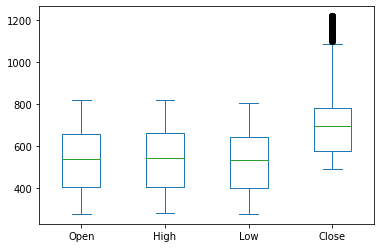

In [12]:
df[['Open', 'High','Low','Close']].plot(kind='box')

C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

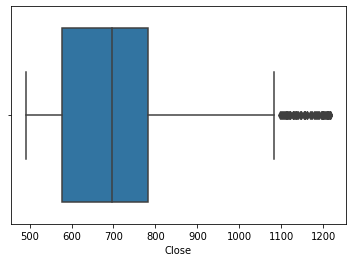

In [13]:
sns.boxplot(df['Close'])

In [14]:
print("mean of close",df['Close'].mean())

mean of close 712.6696661367251


In [15]:
print("std of Close", df['Close'].std())

std of Close 164.75259078525374


In [16]:
df['Close_Zscore']= (df['Close']- df['Close'].mean())/ df['Close'].std()

In [17]:
df

,Date,Open,High,Low,Close,Volume,Close_Zscore
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",-0.297899
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",-0.280540
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",-0.336624
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",-0.391069
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",-0.557865
...,...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400",0.468826
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100",0.478781
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800",0.439327
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300",0.425610


In [18]:
df[df['Close_Zscore']>3]

,Date,Open,High,Low,Close,Volume,Close_Zscore
533,2014-02-18,598.46,604.17,597.76,1207.56,"4,233,500",3.003839
537,2014-02-24,600.43,607.80,600.30,1209.19,"3,361,100",3.013733
538,2014-02-25,605.70,609.96,602.95,1216.66,"2,888,100",3.059074
539,2014-02-26,609.71,612.15,604.61,1216.83,"3,979,100",3.060106
540,2014-02-27,606.92,609.83,606.23,1215.87,"2,529,400",3.054279
541,2014-02-28,607.89,609.81,600.86,1212.32,"4,644,500",3.032731
543,2014-03-04,605.23,605.73,602.49,1211.58,"2,946,300",3.028240
544,2014-03-05,605.26,609.26,603.44,1214.92,"2,479,700",3.048513
545,2014-03-06,608.86,610.79,607.02,1216.27,"2,545,600",3.056707
546,2014-03-07,611.11,611.20,603.46,1211.46,"3,041,500",3.027511


In [19]:
df[df['Close_Zscore']<-3]

,Date,Open,High,Low,Close,Volume,Close_Zscore


In [20]:
new_df= df[(df['Close_Zscore']<3) & (df['Close_Zscore']>-3)]

In [21]:
new_df

,Date,Open,High,Low,Close,Volume,Close_Zscore
0,2012-01-03,325.25,332.83,324.97,663.59,"7,380,500",-0.297899
1,2012-01-04,331.27,333.87,329.08,666.45,"5,749,400",-0.280540
2,2012-01-05,329.83,330.75,326.89,657.21,"6,590,300",-0.336624
3,2012-01-06,328.34,328.77,323.68,648.24,"5,405,900",-0.391069
4,2012-01-09,322.04,322.29,309.46,620.76,"11,688,800",-0.557865
...,...,...,...,...,...,...,...
1253,2016-12-23,790.90,792.74,787.28,789.91,"623,400",0.468826
1254,2016-12-27,790.68,797.86,787.66,791.55,"789,100",0.478781
1255,2016-12-28,793.70,794.23,783.20,785.05,"1,153,800",0.439327
1256,2016-12-29,783.33,785.93,778.92,782.79,"744,300",0.425610


C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Close'>

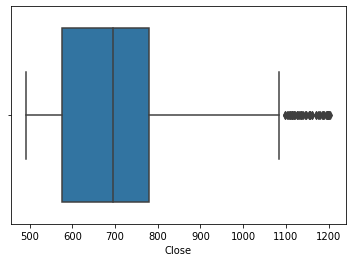

In [22]:
sns.boxplot(new_df['Close'])

In [23]:
from sklearn.model_selection import train_test_split

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [45]:
X= np.array(new_df.index).reshape(-1,1)

In [46]:
X

array([[   0],
       [   1],
       [   2],
       ...,
       [1255],
       [1256],
       [1257]], dtype=int64)

In [47]:
y= new_df[['Close']]

In [48]:
y

,Close
0,663.59
1,666.45
2,657.21
3,648.24
4,620.76
...,...
1253,789.91
1254,791.55
1255,785.05
1256,782.79


In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3, random_state=42)

In [50]:
scaler= StandardScaler().fit(X_train)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lm= LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

In [53]:
!pip install plotly


[notice] A new release of pip available: 22.1.2 -> 22.2.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [54]:
# import chart_studio.plotly as py
# import plotly.graph_objs as go
# from plotly.offline import plot

# from plotly.offline import download_plotyjs, intit_notebook_mode, plot, iplot
# init_notebook_mode(connected=True)

In [55]:
df_predict = lm.predict(X_train)

In [56]:
r2_score(y_train, df_predict)

0.002786552396645492

In [57]:
predict =lm.predict(X_test)

In [58]:
r2_score(y_test, predict)

0.0022876398040310164

In [59]:
mse(y_train,lm.predict(X_train))

26139.873882398555

In [65]:
scores=f'''
{'mse values'.ljust(10)}{mse(y_train,df_predict)}\t {mse(y_test, lm.predict(X_test))}
{'r_2score'.ljust(10)}{r2_score(y_train,df_predict)}\t {r2_score(y_test, lm.predict(X_test))}
'''
print(scores)


mse values26139.873882398555	 21965.96721638863
r_2score  0.002786552396645492	 0.0022876398040310164

